In [2]:
from skimage import io
dog = io.imread("Dog.png")
dog = dog[:50,:50,:]

In [3]:
print(dog.shape)

(50, 50, 4)


In [4]:
from sklearn.cluster import KMeans
import numpy as np
dog = dog.reshape(-1,4)
kmeans = KMeans(n_clusters=4, random_state=0).fit(dog)

In [5]:
forback=kmeans.predict(dog)

In [6]:
sum(forback)

4276

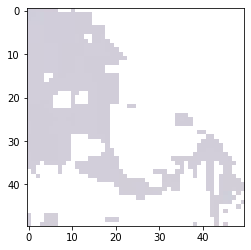

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

masked_image = 0*dog 
masked_image[forback==3,:] = dog[forback==3,:]
masked_image = masked_image.reshape(50,50,4)

plt.imshow(masked_image)
plt.show()

In [8]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal # Multivariate normal random variable


# the following are helper functions to compute, for each data piont, the degrees of belonging to various clusters for each data point 

def belonging_num(data_point, mean_point, covariance_matrix, coefficient_number):
    belonging_num = coefficient_number*multivariate_normal.pdf(data_point, mean_point, covariance_matrix)
    return belonging_num

# helper function for computing the denominator of (EqDoB)
def belonging_den(data_point, means, covariances, coefficients, k):
    belonging_all=np.sum([belonging_num(data_point, means[f], covariances[f], coefficients[f]) for f in range(k)])
    return belonging_all

def update_degrees_of_belonging(data, means, covariances,coefficients,k): 
    cluster_vectors=np.zeros((k,data.shape[0]))   
    for i in range(data.shape[0]):
        belonging_all = belonging_den(data[i], means, covariances, coefficients, k)
        for t in range(k):
            cluster_vectors[t,i]=belonging_num(data[i], means[t], covariances[t], coefficients[t])/belonging_all
    return cluster_vectors


k = 2
gmm = GaussianMixture(n_components = k, max_iter = 10).fit(dog)

cluster_vectors = update_degrees_of_belonging(dog, gmm.means_, gmm.covariances_, gmm.weights_, k)



In [9]:
print(cluster_vectors.shape)

(2, 2500)


In [11]:
cluster_vectors[:10,:]

array([[1.00000000e+00, 1.00000000e+00, 9.25025147e-06, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.99990750e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [14]:
cluster_vectors.T[:,:10]

array([[1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [9.25025147e-06, 9.99990750e-01],
       ...,
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00]])